<font color = ' #cc6600' size = '5'>**Environment Setup**</font>

In [406]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import joblib

<font color = ' #cc6600' size = '5'>**Loading dataset**</font>

In [392]:
mnist_dataset = fetch_openml("mnist_784", version=1, as_frame= False)  #Load data from https://www.openml.org/d/554

In [398]:
X, y = mnist_dataset.data, mnist_dataset.target
y = y.astype(np.uint8)                                # Convert labels to integers
X = X / 255.0                                         # Normalization

print("total number of sample", X.shape[0])
print("dimension of each sample:", X.shape[1])        # 784 pixels (28x28 images) - 784 features
print(f"Unique labels: {np.unique(y)}")

total number of sample 70000
dimension of each sample: 784
Unique labels: [0 1 2 3 4 5 6 7 8 9]


In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/7, random_state=40)  

print("train_number:", X_train.shape[0])
print("test_number:", X_test.shape[0])

train_number: 60000
test_number: 10000


<font color = ' #cc6600' size = '5'>**Show random samples from the training set**</font>

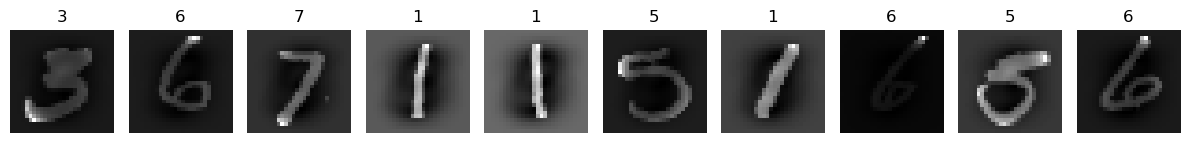

In [192]:
random_samples = np.random.choice(X_train.shape[0], 10, replace=False)

# Plot the selected images
plt.figure(figsize=(12, 4))
for i, k in enumerate(random_samples):
    image = X_train[k].reshape(28, 28)
    label =  y_train[k]
    plt.subplot(1, 10, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(str(label))
    plt.axis('off')
plt.tight_layout()
plt.show()

<font color = ' #cc6600' size = '5'>**Validation set**</font>

In [230]:
# First split: Train (60%) and Temp (40%)

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, 
    test_size=0.4, 
    random_state=40,
    stratify=y
)

# Second split: Validation (20%) and Test (20%) from Temp
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, 
    test_size=0.5, 
    random_state=40,
    stratify=y_temp
)

#scale 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Print dataset sizes
print("Train set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)

Train set: (42000, 784)
Validation set: (14000, 784)
Test set: (14000, 784)


<font color = ' #cc6600' size = '5'>**Training model**</font>


In [400]:
model_configs = [
    {
        'name': '1 h-layer with adam optimizer',
        'params': {
            'hidden_layer_sizes': (64,),
            'activation': 'relu',
            'solver': 'adam',
            'batch_size': 256,
            'alpha': 0.001,
            'learning_rate_init': 0.001,
            'max_iter': 20,                  #epoch =20
            'early_stopping': True,
            'random_state': 40
        }
    },

        {
        'name': '2 h-layer with adam optimizer',
        'params': {
            'hidden_layer_sizes': (128, 64),
            'activation': 'relu',
            'solver': 'adam',
            'batch_size': 64,
            'alpha': 0.001,
            'learning_rate_init': 0.01,
            'max_iter': 40,                 #epoch = 40
            'early_stopping': True,
            'random_state': 40
        }
    },    
        
       {
        'name': '2 h-layer with SGD optimizer',
        'params': {
            'hidden_layer_sizes': (128, 64),
            'activation': 'relu',
            'solver': 'sgd',
            'batch_size': 64,
            'alpha': 0.001,
            'learning_rate_init': 0.01,
            'max_iter': 40,                     #epoch = 40
            'early_stopping': True,
            'random_state': 40
        }
    },

        {
        'name': '2 h-layer with logistic activation fuction',
        'params': {
            'hidden_layer_sizes': (128, 64),
            'activation': 'logistic',
            'solver': 'adam',
            'batch_size': 64,
            'alpha': 0.001,
            'learning_rate_init': 0.01,
            'max_iter': 40,                 #epoch = 40
            'early_stopping': True,
            'random_state': 40
        }
    },
      {
        'name': 'deep model with tanh activation function',
        'params': {
            'hidden_layer_sizes': (256, 128, 64),
            'activation': 'tanh',
            'solver': 'adam',
            'batch_size': 128,
            'alpha': 0.001,
            'learning_rate_init': 0.001,
            'max_iter': 30,                    #epoch = 30
            'early_stopping': True,
            'validation_fraction': 0.1,
            'random_state': 40
        }   
      }
]

In [243]:
results = []


for config in model_configs:
    print(f"\ntraining {config['name']}...")
    
    # ساخت مدل
    mlp = MLPClassifier(**config['params'])
    
    # آموزش مدل
    mlp.fit(X_train_scaled, y_train)
    
    #  محاسبه دقت داده آموزش و ولیدیشن
    train_acc = accuracy_score(y_train, mlp.predict(X_train_scaled))
    val_acc = accuracy_score(y_val, mlp.predict(X_val_scaled))

    results.append({
        'name': config['name'],
        'model': mlp,
        'train_acc': train_acc,
        'val_acc': val_acc,
        'loss_curve': mlp.loss_curve_,
        'val_curve': mlp.validation_scores_
    })
    
    print(f"{config['name']} - Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")



training 1 h-layer with adam optimizer...


C:\Users\zahra\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


1 h-layer with adam optimizer - Train Acc: 0.9958, Val Acc: 0.9644

training 2 h-layer with adam optimizer...
2 h-layer with adam optimizer - Train Acc: 0.9547, Val Acc: 0.9411

training 2 h-layer with SGD optimizer...
2 h-layer with SGD optimizer - Train Acc: 0.9966, Val Acc: 0.9691

training 2 h-layer with linear activation fuction...
2 h-layer with linear activation fuction - Train Acc: 0.9825, Val Acc: 0.9567

training deep model with tanh activation function...
deep model with tanh activation function - Train Acc: 0.9963, Val Acc: 0.9648


In [ ]:
print(f"Number of iterations: {mlp.n_iter_}")

<font color = ' #cc6600' size = '5'>**Loss and accuracy**</font>

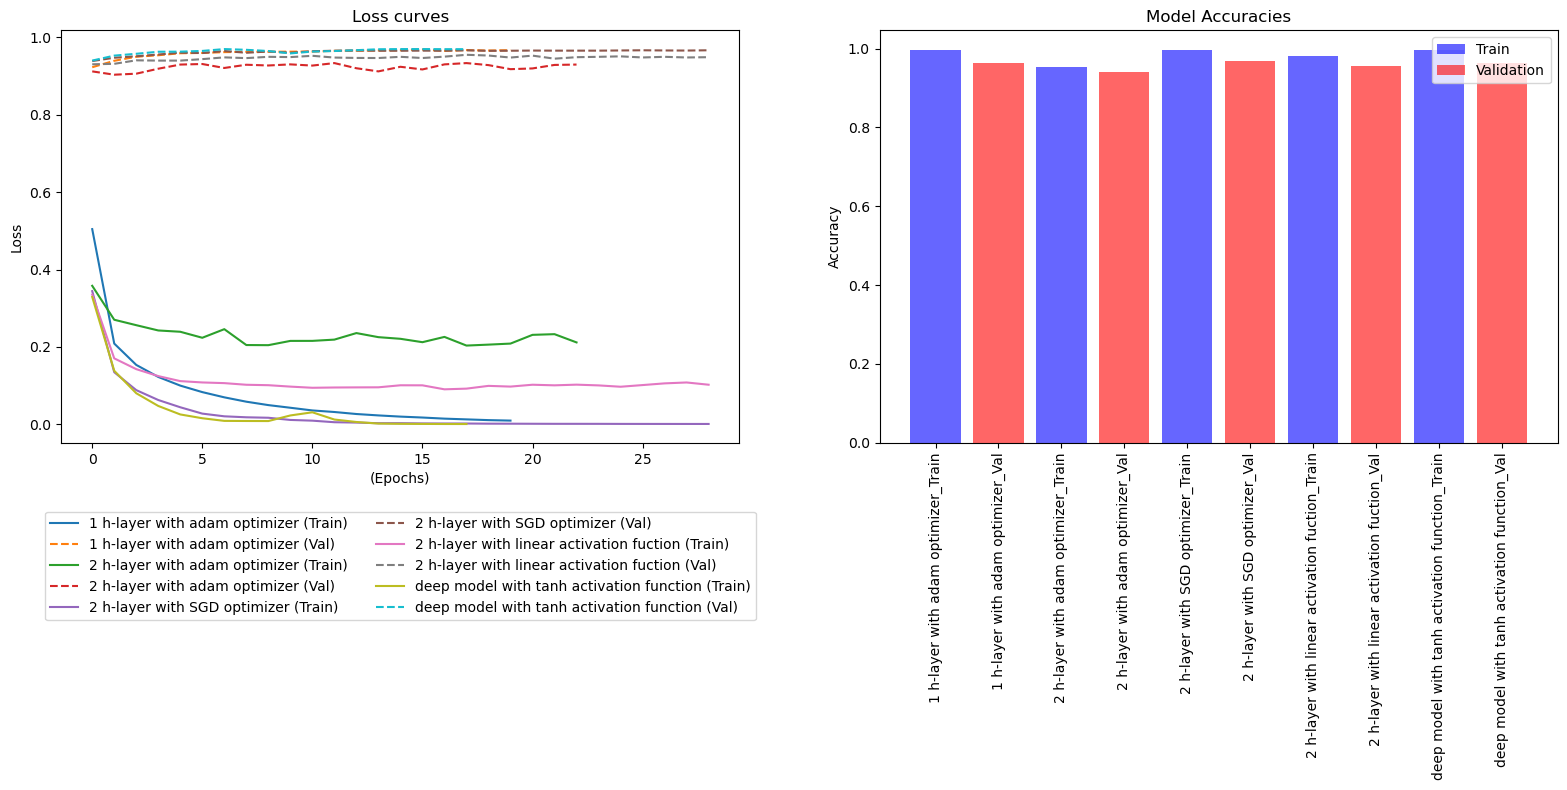

In [381]:
plt.figure(figsize=(16, 8))

# loss
plt.subplot(1, 2, 1)
for res in results:
    plt.plot(res['loss_curve'], label=f"{res['name']} (Train)")
    if res['val_curve'] is not None:
        plt.plot(res['val_curve'], '--', label=f"{res['name']} (Val)")
plt.title('Loss curves')
plt.xlabel('(Epochs)')
plt.ylabel('Loss')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

#accuracy
plt.subplot(1, 2, 2)
for res in results:
    plt.bar(res['name']+'_Train', res['train_acc'], color='blue', alpha=0.6)
    plt.bar(res['name']+'_Val', res['val_acc'], color='red', alpha=0.6)
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

In [359]:
best_model = np.argmax([res['val_acc'] for res in results])
best_model = results[best_model]

print(f" best model: {best_model['name']}")
#because:
print(f" Train accuracy: {best_model['train_acc']:.4f}")
print(f" Validation accuracy: {best_model['val_acc']:.4f}")

 best model: 2 h-layer with SGD optimizer
 Train accuracy: 0.9966
 Validation accuracy: 0.9691


In [361]:
test_acc = accuracy_score(y_test, best_model['model'].predict(X_test_scaled))
print(f" Test accuracy : {test_acc:.4f}")

 Test accuracy : 0.9711


In [367]:
y_pred = best_model['model'].predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1381
           1       0.99      0.99      0.99      1575
           2       0.97      0.97      0.97      1398
           3       0.97      0.96      0.96      1428
           4       0.98      0.98      0.98      1365
           5       0.96      0.96      0.96      1263
           6       0.97      0.98      0.98      1375
           7       0.97      0.98      0.97      1459
           8       0.96      0.95      0.95      1365
           9       0.97      0.96      0.96      1391

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



<font color = ' #cc6600' size = '5'>**Confusion matrix**</font>

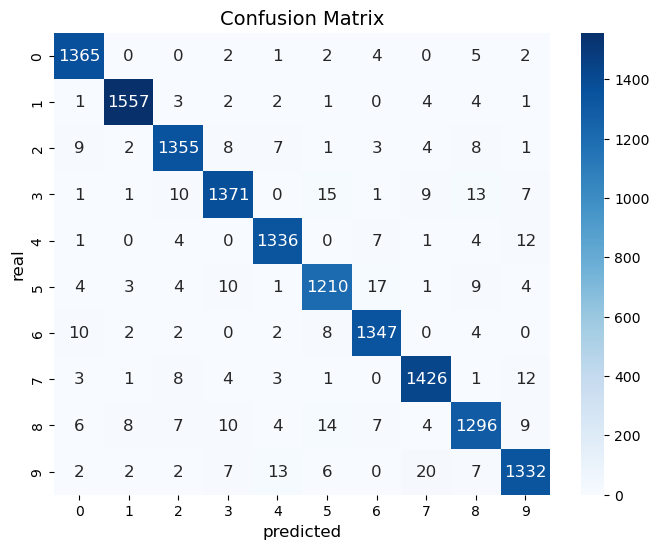

In [408]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12}) 
plt.xlabel("predicted", fontsize =12)
plt.ylabel("real", fontsize =12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

In [410]:
joblib.dump(mlp, 'mlp_mnist_model.pkl')

['mlp_mnist_model.pkl']